## Individual performance of the models

In this notebook, we will look at the individual performance of the models, so all models are evaluated on their own test set (no cross-predictions) (Figure 1, S3, S4). 

In [1]:
import os
import warnings
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns

matplotlib.rcParams['pdf.fonttype'] = 42

### Results tissue-specific bulk

Figure S3, 1C

In [2]:
def corr_bulk(tissue, plot=False, title=0):
    
    ct_res = pd.DataFrame(data=np.zeros((20,1)))
    y_true_all = []
    y_pred_all = []
     
    # Iterate over results of the 20-fold CV
    for i in range(20):
        
        y_pred = 0
        
        # Results of the 5 models
        for j in range(5):
            
            pred_file = '../../Zenodo/mouse/TM_bulk/logmean_zscore_' + tissue + '_' + str(i) + '/logs_dir' + str(j) + '/results_testdata_best.pkl'
            y = pd.read_pickle(pred_file)
            y_true = np.asarray(y['y_true'])
            y_pred = y_pred + np.asarray(y['y_pred'])/5

        y_true_all.extend(y_true)
        y_pred_all.extend(y_pred)

        corr,_ = pearsonr(y_true, y_pred)

        ct_res.loc[i] = corr

    if plot:
        
        hue_ = np.zeros_like(y_true_all)

        h = sns.jointplot(x=y_true_all, y=y_pred_all, hue=hue_, s=5, legend=False)
        h.set_axis_labels('x', 'y', fontsize=14)
        h.ax_joint.set_xlabel('True expression')
        h.ax_joint.set_ylabel('Predicted expression')
        h.fig.suptitle(title)
        h.ax_joint.text(0.95, 0.05, 'r = ' + str(np.round(np.median(ct_res),3)),
            verticalalignment='bottom', horizontalalignment='right',
            transform=h.ax_joint.transAxes, fontsize=12)
        plt.show()
    
    return ct_res


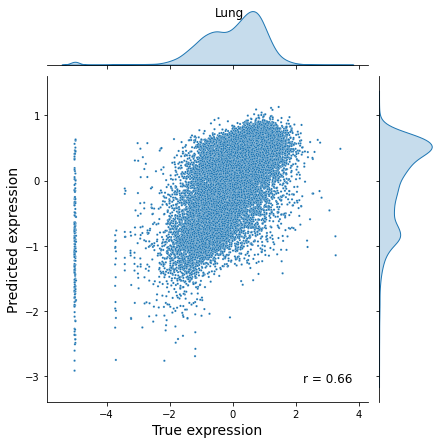

In [3]:
res_Bulk = pd.DataFrame(data=np.zeros((80,2)), columns=['Tissue', 'Correlation'])
res_Bulk = res_Bulk.astype({"Tissue": str})

tissues_Bulk = ['Spleen', 'Lung', 'Marrow','Limb_Muscle']

for i,t in enumerate(tissues_Bulk):
    
    res_Bulk.loc[i*20:(i+1)*20, 'Tissue'] = tissues_Bulk[i]
    if t == 'Lung':
        # Scatterplot for the lung (Figure S3)
        res_Bulk['Correlation'].values[i*20:(i+1)*20] = corr_bulk(t, True, 'Lung')[0]
    else:
        res_Bulk['Correlation'].values[i*20:(i+1)*20] = corr_bulk(t)[0]


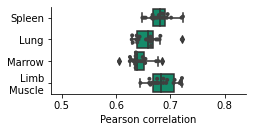

In [4]:
# Figure 1C
plt.figure(figsize=(3.5,1.6))
sns.boxplot(data=res_Bulk, y='Tissue', x='Correlation', color=sns.color_palette('colorblind', as_cmap=True)[2])
g = sns.swarmplot(data=res_Bulk, y='Tissue', x='Correlation', color=".25", size=4)
sns.despine()
plt.ylabel('')
plt.xlabel('Pearson correlation')
g.set_yticklabels(['Spleen', 'Lung', 'Marrow','Limb\nMuscle'])
plt.xlim([0.48, 0.84])
plt.show()

### Results tissue-specific (pseudo-bulk)

Figure 1D, S3B, S4A

In [5]:
def corr_pb(filename, plot = False, title=0):
    
    ct_res = pd.DataFrame(data=np.zeros((20,1)))
    y_true_all = []
    y_pred_all = []
    
    # Iterate over the 20 folds 
    for i in range(20):
        
        y_pred = 0
        
        # Iterate over the 5 models
        for j in range(5):
            
            pred_file = filename + str(i) + '/logs_dir' + str(j) + '/results_testdata_best.pkl'
            y = pd.read_pickle(pred_file)
            y_true = np.asarray(y['y_true'])
            y_pred = y_pred + np.asarray(y['y_pred'])/5
                
        y_true_all.extend(y_true)
        y_pred_all.extend(y_pred)

        corr,_ = pearsonr(y_true, y_pred)

        ct_res.loc[i] = corr
        
    if plot:
        
        hue_ = np.zeros_like(y_true_all)

        h = sns.jointplot(x=y_true_all, y=y_pred_all, hue=hue_, s=5, legend=False)
        h.set_axis_labels('x', 'y', fontsize=14)
        h.ax_joint.set_xlabel('True expression')
        h.ax_joint.set_ylabel('Predicted expression')
        h.fig.suptitle(title)
        h.ax_joint.text(0.95, 0.05, 'r = ' + str(np.round(np.median(ct_res),3)),
            verticalalignment='bottom', horizontalalignment='right',
            transform=h.ax_joint.transAxes, fontsize=12)
        plt.show()


    
    return ct_res


#### FACS-sorted Smart-seq2 results

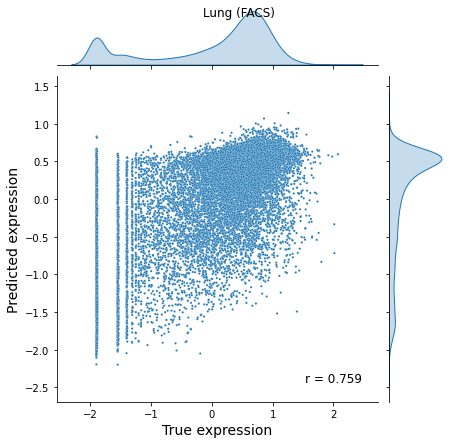

In [6]:
res_PB1 = pd.DataFrame(data=np.zeros((100,2)), columns=['Tissue', 'Correlation'])
res_PB1 = res_PB1.astype({"Tissue": str})

tissues = ['spleen', 'lung', 'marrow', 'muscle', 'gland']

i = 0

for t in tissues:
    filename = '../../Zenodo/mouse/TM_FACS_SM2/' + t + '/tissue_specific/logmean_zscore_All_'
    res_PB1.loc[i*20:(i+1)*20, 'Tissue'] = t
    if t == 'lung':
        # Scatterplot for the lung pseudobulk (Figure S3B)
        res_PB1['Correlation'].values[i*20:(i+1)*20] = corr_pb(filename, plot=True, title='Lung (FACS)')[0]
    else:
        res_PB1['Correlation'].values[i*20:(i+1)*20] = corr_pb(filename)[0]
    i += 1


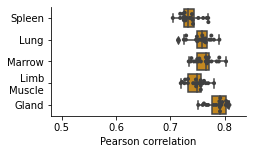

In [7]:
# Figure 1D
plt.figure(figsize=(3.5, 2))
sns.boxplot(data=res_PB1, y='Tissue', x='Correlation', color=sns.color_palette('colorblind', as_cmap=True)[1])
g = sns.swarmplot(data=res_PB1, y='Tissue', x='Correlation', color=".25", size=4)
plt.ylabel('')
plt.xlabel('Pearson correlation')
g.set_yticklabels(['Spleen', 'Lung', 'Marrow', 'Limb\nMuscle', 'Gland'])
sns.despine()
plt.xlim([0.48, 0.84])
plt.show()

#### 10X results

In [8]:
res_PB2 = pd.DataFrame(data=np.zeros((100,2)), columns=['Tissue', 'Correlation'])
res_PB2 = res_PB2.astype({"Tissue": str})

tissues = ['spleen', 'lung', 'marrow', 'muscle', 'gland']

i = 0

for t in tissues:
    filename = '../../Zenodo/mouse/TM_10X/' + t + '/tissue_specific/logmean_zscore_All_'
    res_PB2.loc[i*20:(i+1)*20, 'Tissue'] = t
    res_PB2['Correlation'].values[i*20:(i+1)*20] = corr_pb(filename)[0]
    i += 1


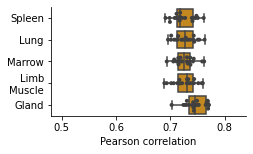

In [9]:
# Figure S4A
plt.figure(figsize=(3.5, 2))
sns.boxplot(data=res_PB2, y='Tissue', x='Correlation', color=sns.color_palette('colorblind', as_cmap=True)[1])
g = sns.swarmplot(data=res_PB2, y='Tissue', x='Correlation', color=".25", size=4)
plt.ylabel('')
plt.xlabel('Pearson correlation')
g.set_yticklabels(['Spleen', 'Lung', 'Marrow', 'Limb\nMuscle', 'Gland'])
sns.despine()
plt.xlim([0.48, 0.84])
plt.show()


### Results cell population-specific (pseudo-bulk)

Here, we aggegrate the results per tissue.

Figure 1E, S4B

In [10]:
def corr_cp(filename, plot = False):
    
    # Find number of cell populations in that tissue
    file = filename + str(0) + '/logs_dir' + str(0) + '/results_testdata_best.pkl'
    y = pd.read_pickle(file)
    y_true = np.asarray(y['y_true'])
    num_cp = np.shape(y_true)[1]
    
    ct_res = pd.DataFrame(data=np.zeros((20,num_cp)))

    # Iterate over 20 folds
    for i in range(20):
        
        y_pred = 0
            
        # Iterate over the 5 models
        for k in range(5):

            # Performance test data
            file = filename + str(i) + '/logs_dir' + str(k) + '/results_testdata_best.pkl'
            y = pd.read_pickle(file)
            y_true = np.asarray(y['y_true'])
            y_pred = y_pred + np.asarray(y['y_pred'])/5

        correlations=pd.DataFrame(np.hstack((y_true, y_pred))).corr().iloc[:num_cp,num_cp:]
        ct_res.loc[i] = np.diag(correlations.values)
                
    return np.median(ct_res, axis=0)

#### FACS-sorted Smart-seq2

In [11]:
res_CP1 = pd.DataFrame(data=np.zeros((0,2)), columns=['Tissue', 'Correlation'])
res_CP1 = res_CP1.astype({"Tissue": str})

tissues = ['spleen', 'lung', 'marrow', 'muscle', 'gland']

i = 0
                
for t in tissues:
    filename = '../../Zenodo/mouse/TM_FACS_SM2/' + t + '/cp_specific/logmean_zscore_multitask_'
    corr_i = corr_cp(filename)
    res_CP_i = pd.DataFrame(data=np.zeros((len(corr_i),2)), columns=['Tissue', 'Correlation'])
    res_CP_i = res_CP_i.astype({"Tissue": str})     
    res_CP_i['Tissue'] = t
    res_CP_i['Correlation'] = corr_i

    res_CP1 = pd.concat((res_CP1, res_CP_i))
                


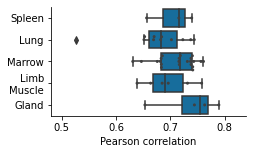

In [12]:
# Figure 1E
plt.figure(figsize=(3.5, 2))
sns.boxplot(data=res_CP1, y='Tissue', x='Correlation', color=sns.color_palette('colorblind', as_cmap=True)[0])
g = sns.swarmplot(data=res_CP1, y='Tissue', x='Correlation', color=".25", size=3)
sns.despine()
plt.ylabel('')
plt.xlabel('Pearson correlation')
g.set_yticklabels(['Spleen', 'Lung', 'Marrow', 'Limb\nMuscle', 'Gland'])
plt.xlim([0.48, 0.84])
plt.show()

#### 10X

In [13]:
res_CP2 = pd.DataFrame(data=np.zeros((0,2)), columns=['Tissue', 'Correlation'])
res_CP2 = res_CP2.astype({"Tissue": str})

tissues = ['spleen', 'lung', 'marrow', 'muscle', 'gland']

i = 0
                
for t in tissues:
    filename = '../../Zenodo/mouse/TM_10X/' + t + '/cp_specific/logmean_zscore_multitask_'
    corr_i = corr_cp(filename)
    res_CP_i = pd.DataFrame(data=np.zeros((len(corr_i),2)), columns=['Tissue', 'Correlation'])
    res_CP_i = res_CP_i.astype({"Tissue": str})     
    res_CP_i['Tissue'] = t
    res_CP_i['Correlation'] = corr_i

    res_CP2 = pd.concat((res_CP2, res_CP_i))
                


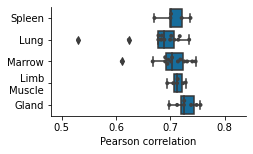

In [14]:
# Figure S4B
plt.figure(figsize=(3.5, 2))
sns.boxplot(data=res_CP2, y='Tissue', x='Correlation', color=sns.color_palette('colorblind', as_cmap=True)[0])
g = sns.swarmplot(data=res_CP2, y='Tissue', x='Correlation', color=".25", size=4)
sns.despine()
plt.ylabel('')
plt.xlabel('Pearson correlation')
g.set_yticklabels(['Spleen', 'Lung', 'Marrow', 'Limb\nMuscle', 'Gland'])
plt.xlim([0.48, 0.84])
plt.show()

### Results cell population-specific (pseudo-bulk)

Here, we plot the performance per population instead of aggregating over an tissue.

Figure 1F, S6


In [15]:
def corr_cp_sep(filename, cp, plot = False, cp_plt = 0):
    
    num_cp = len(cp)
        
    ct_res = pd.DataFrame(data=np.zeros((20,num_cp)), columns=cp)
    
    y_pred_all = []
    y_true_all = []
    
    # Iterate over the models
    for i in range(20):
        
        y_pred = 0
            
        for k in range(5):

            # Performance test data
            file = filename + str(i) + '/logs_dir' + str(k) + '/results_testdata_best.pkl'
            y = pd.read_pickle(file)
            y_true = np.asarray(y['y_true'])
            y_pred = y_pred + np.asarray(y['y_pred'])/5
        
        y_pred_all.extend(y_pred)
        y_true_all.extend(y_true)
        
        correlations=pd.DataFrame(np.hstack((y_true, y_pred))).corr().iloc[:num_cp,num_cp:]
        ct_res.loc[i] = np.diag(correlations.values)
        
    if plot:
        
        for c in cp_plt:
            
            idx = np.where(cp == c)[0]
            y_pred_plt = np.asarray(y_pred_all)[:,idx]
            y_true_plt = np.asarray(y_true_all)[:,idx]
        
            hue_ = np.zeros_like(y_true_plt)

            h = sns.jointplot(x=np.squeeze(y_true_plt), y=np.squeeze(y_pred_plt), 
                              hue=np.squeeze(hue_), s=5, legend=False,
                             rasterized=True)
            h.set_axis_labels('x', 'y', fontsize=14)
            h.ax_joint.set_xlabel('True expression')
            h.ax_joint.set_ylabel('Predicted expression')
            h.fig.suptitle(c)
            h.ax_joint.text(0.95, 0.05, 'r = ' + str(np.round(np.median(ct_res.values[:,idx]),3)),
                verticalalignment='bottom', horizontalalignment='right',
                transform=h.ax_joint.transAxes, fontsize=12)
            plt.show()

                
    return ct_res, y_pred_all

Here, we will plot the performance of models trained on the cell populations of the lung.

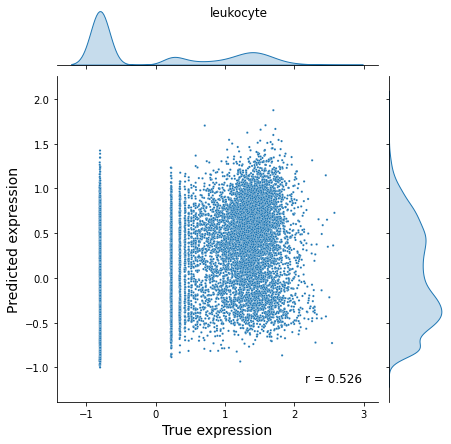

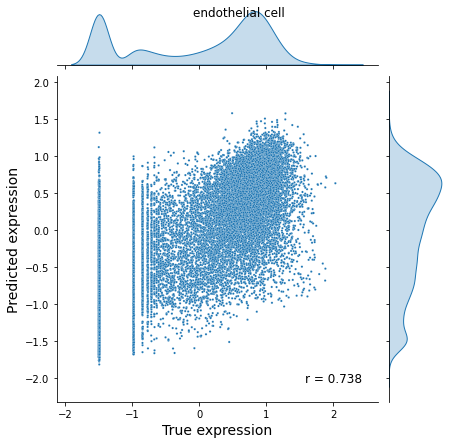

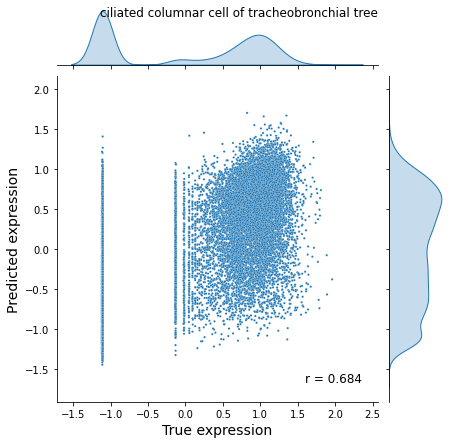

In [16]:
# Figure S6
cp = pd.read_csv('../../Zenodo/mouse/TM_FACS_SM2/lung/pseudobulk.csv',index_col=0).columns[1:]
filename = '../../Zenodo/mouse/TM_FACS_SM2/lung/cp_specific/logmean_zscore_multitask_'
lung_FACS, y_pred = corr_cp_sep(filename, cp, True, 
                                ['leukocyte', 'endothelial cell', 'ciliated columnar cell of tracheobronchial tree'])


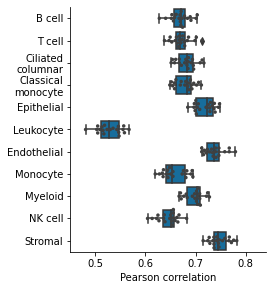

In [17]:
# Figure 1F
lung_FACS = pd.melt(lung_FACS, value_name='Correlation', var_name='Cell population')

plt.figure(figsize=(3.5,4.5))
sns.boxplot(data=lung_FACS, y='Cell population', x='Correlation', color=sns.color_palette('colorblind', as_cmap=True)[0])
g = sns.swarmplot(data=lung_FACS, y='Cell population', x='Correlation', color=".25", size=3.5)
sns.despine()
plt.ylabel('')
plt.xlabel('Pearson correlation')
g.set_yticklabels(['B cell', 'T cell', 'Ciliated\ncolumnar', 'Classical\nmonocyte', 'Epithelial',
                   'Leukocyte', 'Endothelial', 'Monocyte', 'Myeloid', 'NK cell', 'Stromal'])
plt.xlim([0.45, 0.84])
plt.show()